In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

In [2]:
df = pd.read_csv('Heart Failure Prediction.csv')
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [11]:
df_k = PCA(2).fit_transform(df)

In [15]:
kmeans = KMeans(n_clusters=3).fit(df_k)
label = kmeans.fit_predict(df_k)

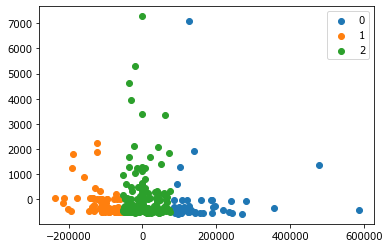

In [16]:
u_labels = np.unique(label)
for i in u_labels:
    plt.scatter(df_k[label == i , 0] , df_k[label == i , 1] , label = i)
plt.legend()
plt.show()

In [19]:
dbclust = DBSCAN(eps = 0.9, min_samples = 5).fit(df_k)